## Let's build a classifier to predict whether or not rides will be > 30 min.

In [202]:
from numpy import *
import numpy as np
import scipy
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import seaborn


# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
import sklearn
from sklearn import metrics
from sklearn.cross_validation import cross_val_score, ShuffleSplit

import sys
sys.path.append("/Users/efandel/Desktop/iPython Tools")
from rtbpythonutils import *
%matplotlib inline

In [245]:
trip_data = pd.read_csv('/Users/efandel/Desktop/hubway_2011_07_through_2013_11/hubway_trips.csv')
station_data = pd.read_csv('/Users/efandel/Desktop/hubway_2011_07_through_2013_11/hubway_stations.csv')
trip_data['label'] = trip_data.duration
trip_data.loc[trip_data['duration']/60 < 30, 'label'] = 0
trip_data.loc[trip_data['duration']/60 >= 30, 'label'] = 1
trip_data.dropna(inplace=True)

In [251]:
trip_data.groupby(['label'])['seq_id'].count()

label
0    341899
1      8499
Name: seq_id, dtype: int64

### ^ Many more negatives than positives... let's balance the classes

In [253]:
negatives = trip_data[trip_data.label==0]
positives = trip_data[trip_data.label==1]

negative_fraction = 1

negatives = negatives.sample(round(len(positives)*negative_fraction))

trip_data_balanced = pd.concat([negatives,positives])

In [254]:
len(negatives)

8499

In [255]:
len(positives)

8499

In [249]:
def random_split(X,Y, frac=0.8):
    msk = np.random.rand(len(X)) < frac
    return X[msk], Y[msk], X[~msk], Y[~msk]

In [256]:
#columns = ['gender']
columns = ['gender','birth_date','strt_statn','end_statn']
X = pd.get_dummies(trip_data_balanced[columns])
Y = trip_data_balanced['label']

X_train, Y_train, X_test, Y_test = random_split(X, Y)

Logistic Regression
('Training Accuracy', 56.81)
('Test Accuracy', 58.34)
('Training Loss', 0.68225676814990521)
('Test Loss', 0.67941879990638776)
('Mean Loss', 0.69321868135922893)
 
Cross-Validation AUCs [ 0.51133235  0.52887509  0.57841938  0.5989808   0.47788021], Average AUC 0.539097565041
 
Confusion Matrix
[[1285  421]
 [ 978  674]]


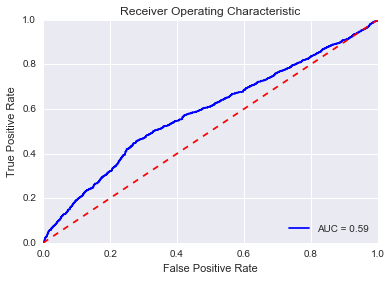

In [262]:
method = "Logistic Regression"

model = LogisticRegression()
model.fit(X_train, Y_train)

train_acc = round(model.score(X_train, Y_train) * 100, 2)
test_acc = round(model.score(X_test, Y_test) * 100, 2)

train_loss = sklearn.metrics.log_loss(Y_train, model.predict_proba(X_train)[:,1])
test_loss = sklearn.metrics.log_loss(Y_test, model.predict_proba(X_test)[:,1])

mean_loss = sklearn.metrics.log_loss(Y_test, ones(len(Y_test)) * mean(Y_train))

confusion_matrix = sklearn.metrics.confusion_matrix(Y_test,model.predict(X_test))

print(method)
print("Training Accuracy", train_acc)
print("Test Accuracy", test_acc)
print("Training Loss", train_loss)
print("Test Loss", test_loss)
print("Mean Loss", mean_loss)
scores = cross_val_score(model, X, Y, scoring='roc_auc', cv=5)
print(" ")
print('Cross-Validation AUCs {}, Average AUC {}'.format(scores, scores.mean()))
print(" ")
print("Confusion Matrix")
print(confusion_matrix)

probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Decision Tree
('Training Accuracy', 63.88)
('Test Accuracy', 60.66)
('Training Loss', 0.62168378180721318)
('Test Loss', 0.84777934025536816)
('Mean Loss', 0.69321868135922893)
 
Cross-Validation AUCs [ 0.57337284  0.5852955   0.59483253  0.63582751  0.51288159], Average AUC 0.580441992008
 
Confusion Matrix
[[1150  556]
 [ 765  887]]


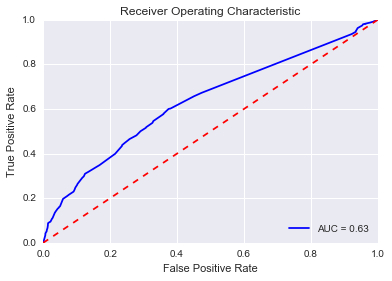

In [258]:
method = "Decision Tree"

model = DecisionTreeClassifier(max_depth = 8)
model.fit(X_train, Y_train)

train_acc = round(model.score(X_train, Y_train) * 100, 2)
test_acc = round(model.score(X_test, Y_test) * 100, 2)

train_loss = sklearn.metrics.log_loss(Y_train, model.predict_proba(X_train)[:,1])
test_loss = sklearn.metrics.log_loss(Y_test, model.predict_proba(X_test)[:,1])

mean_loss = sklearn.metrics.log_loss(Y_test, ones(len(Y_test)) * mean(Y_train))

confusion_matrix = sklearn.metrics.confusion_matrix(Y_test,model.predict(X_test))


print(method)
print("Training Accuracy", train_acc)
print("Test Accuracy", test_acc)
print("Training Loss", train_loss)
print("Test Loss", test_loss)
print("Mean Loss", mean_loss)
scores = cross_val_score(model, X, Y, scoring='roc_auc', cv=5)
print(" ")
print('Cross-Validation AUCs {}, Average AUC {}'.format(scores, scores.mean()))
print(" ")
print("Confusion Matrix")
print(confusion_matrix)

probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Random Forest
('Training Accuracy', 95.04)
('Test Accuracy', 64.71)
('Training Loss', 0.1942946233556791)
('Test Loss', 1.6587082529119608)
('Mean Loss', 0.69321868135922893)
 
Cross-Validation AUCs [ 0.67233875  0.67884567  0.70430242  0.7006019   0.62589669], Average AUC 0.676397088086
 
Confusion Matrix
[[1188  518]
 [ 667  985]]


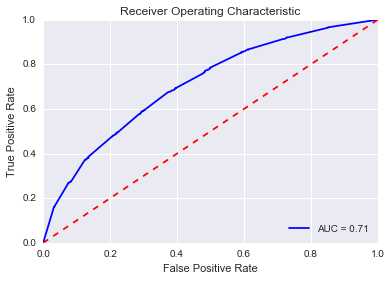

In [259]:
method="Random Forest"

model = RandomForestClassifier(n_estimators=10)
model.fit(X_train, Y_train)

train_acc = round(model.score(X_train, Y_train) * 100, 2)
test_acc = round(model.score(X_test, Y_test) * 100, 2)

train_loss = sklearn.metrics.log_loss(Y_train, model.predict_proba(X_train)[:,1])
test_loss = sklearn.metrics.log_loss(Y_test, model.predict_proba(X_test)[:,1])

mean_loss = sklearn.metrics.log_loss(Y_test, ones(len(Y_test)) * mean(Y_train))

confusion_matrix = sklearn.metrics.confusion_matrix(Y_test,model.predict(X_test))

print(method)
print("Training Accuracy", train_acc)
print("Test Accuracy", test_acc)
print("Training Loss", train_loss)
print("Test Loss", test_loss)
print("Mean Loss", mean_loss)
scores = cross_val_score(model, X, Y, scoring='roc_auc', cv=5)
print(" ")
print('Cross-Validation AUCs {}, Average AUC {}'.format(scores, scores.mean()))
print(" ")
print("Confusion Matrix")
print(confusion_matrix)

probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()